# Task-4 Mini Visualization Dashboard (Titanic Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# Load Titanic Dataset
# Update the path as needed
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Safe delete (no KeyError)
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

In [6]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


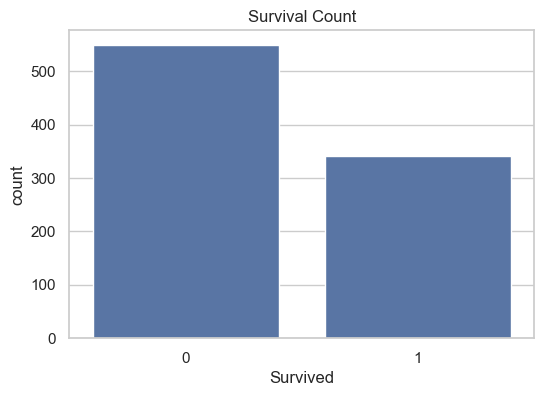

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

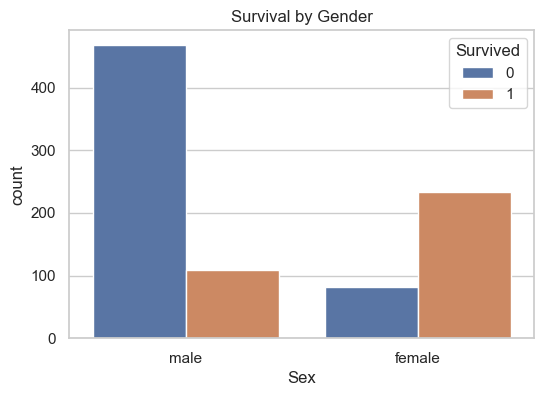

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

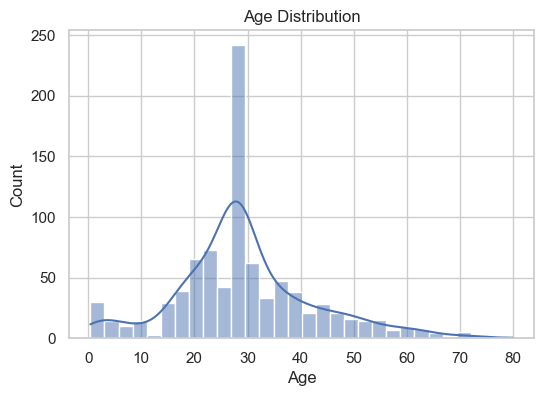

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

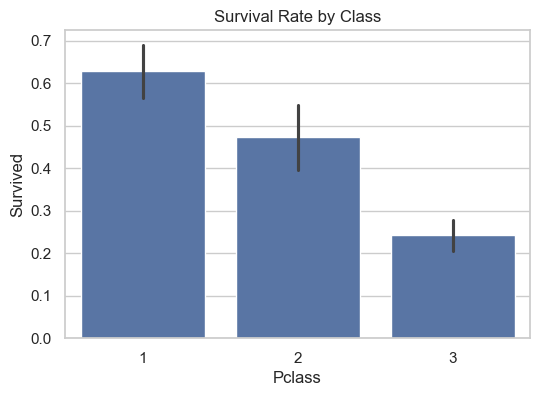

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Class")
plt.show()

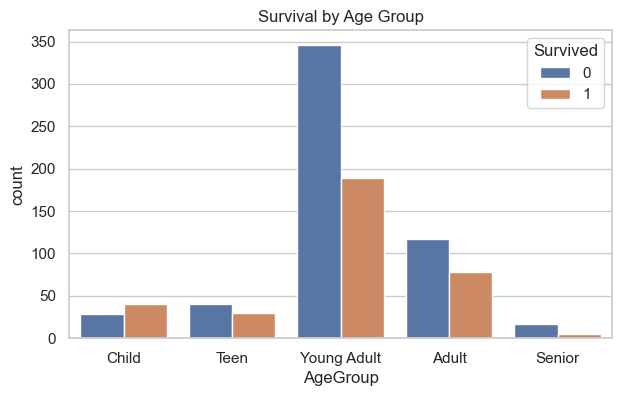

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title("Survival by Age Group")
plt.show()

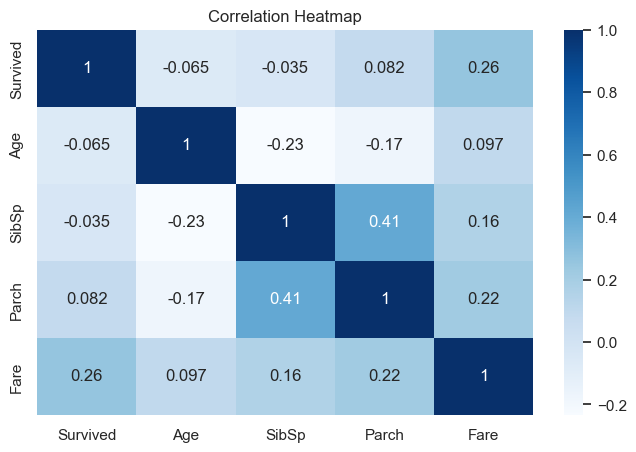

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Survived','Age','SibSp','Parch','Fare']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

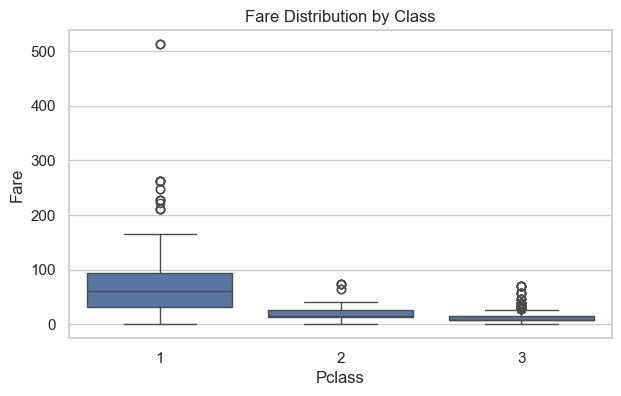

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Fare Distribution by Class")
plt.show()

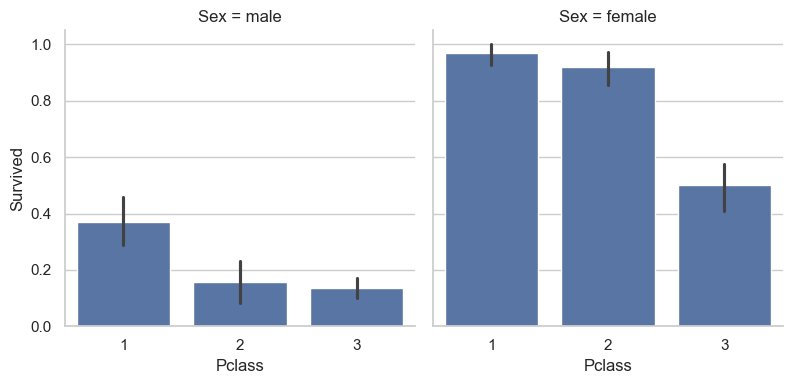

In [15]:
sns.catplot(data=df, col="Sex", x="Pclass", y="Survived", kind="bar", height=4)